# PROJECT
# **HOUSE SALES IN KING COUNTY** # 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
conda install scikit-learn

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [5]:
import seaborn as sns

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [8]:
from sklearn.pipeline import Pipeline

In [9]:
df = pd.read_csv("kc_house_data.csv", index_col = 0)

In [10]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [11]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Text(0.5, 1.0, 'Waterfront and price')

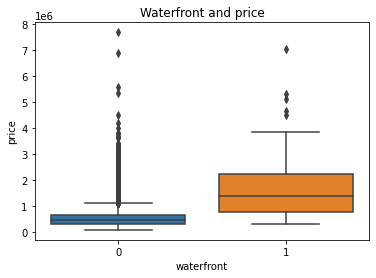

In [14]:
sns.boxplot(x=df['waterfront'], y=df['price'], data=df)
plt.title("Waterfront and price")

Text(0.5, 1.0, 'Price and square foot above')

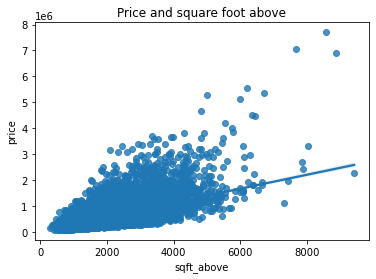

In [15]:
sns.regplot(x=df['sqft_above'], y=df['price'], data=df)
plt.title('Price and square foot above')

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(df[['sqft_living']], df['price'])

LinearRegression()

In [18]:
lm.score(df[['sqft_living']], df['price'])

0.4928532179037931

About 49.3% of the price variation can be explained by the area of the house. 

In [86]:
Z = df[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]

In [88]:
lm.fit(Z, df['price'])

LinearRegression()

In [89]:
lm.score(Z, df['price'])

0.6577151058279327

About 65.77% variation in price can be explained by the combination of multiple factors.

In [90]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures()), ('model', LinearRegression())]

In [91]:
pipe = Pipeline(Input)
Y=df['price']

In [92]:
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [93]:
pipe.score(Z,Y)

0.7513463592385101

In [94]:
lm.predict(Z)

array([283413.07663037, 662377.8434902 , 305956.87442548, ...,
       304309.00758763, 428626.84540527, 304107.09789894])

In [95]:
from sklearn.linear_model import Ridge

In [96]:
RidgeModel = Ridge(alpha = 0.1)

In [97]:
X = Z
Y = df['price']

In [98]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state = 0)

In [69]:
print('Test samples: ', x_test.shape[0])
print('Train samples: ', x_train.shape[0]) #df has n rows and m columns, df(n,m). df.shape[0] returns the number of n(rows)

Test samples:  3242
Train samples:  18371


In [70]:
RidgeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [71]:
RidgeModel.score(x_test, y_test)

0.6486079840624535

In [106]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']])
x_test_pr = pr.fit_transform(x_test[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']])

In [107]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [110]:
train_score = RidgeModel.score(x_train_pr, y_train)
print('R-squared score for training data is: ', train_score)

R-squared score for training data is:  0.7419988745669358


In [111]:
test_score = RidgeModel.score(x_test_pr, y_test)
print('R-squared score for testing data is: ', test_score)

R-squared score for testing data is:  0.7157120590312582
